# Reinforced learning, työllistyminen ja Suomen sosiaaliturva

Tässä tehdään laskelmat artikkelia varten. Käytössä on gym-ympäristö _unemployment-v1_ , johon on toteutettu yksityiskohtaisesti sosiaaliturvaa eri tiloissa.

In [1]:
# for Colab, install fin_benefits and unemployment-gym from Github
#!pip install -q git+https://github.com/ajtanskanen/benefits.git  
#!pip install -q git+https://github.com/ajtanskanen/econogym.git
#!pip install -q git+https://github.com/ajtanskanen/lifecycle-rl.git

# and then restart kernel
  
  # For a specific version:
#!pip install tensorflow==1.15
#!pip install stable-baselines==2.8
  
# restart kernel after running pip's

In [2]:
#import sys
#print(sys.path)
#sys.path.append('/usr/local/python3.7/site-packages')

Then load all modules and set parameters for simulations.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from lifecycle_rl import Lifecycle

%matplotlib inline
%pylab inline

# varoitukset piiloon (Stable baseline ei ole vielä Tensorflow 2.0-yhteensopiva, ja Tensorflow 1.15 valittaa paljon)
# ei taida toimia piilottaminen
import warnings
warnings.filterwarnings('ignore')


The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Populating the interactive namespace from numpy and matplotlib


In [4]:
## parameters for the simulation
# episode = 51 / 205 timesteps (1y/3m timestep)
pop_size=10_000 # size of the population to be simulated
size1=10_000_000 # number of timesteps in phase 1 training (callback not used)
size2=100_000_000 #0_000 # number of timesteps in phase 2 training (callback is used to save the best results)
size3=20_000_000 # number of timesteps in phase 1 training (callback not used) for policy changes
batch1=1_00 # size of minibatch in phase 1 as number of episodes
batch2=9_00  # size of minibatch in phase 1 as number of episodes
callback_minsteps=batch2 # how many episodes callback needs 
deterministic=False # use deterministic prediction (True) or probabilitic prediction (False)
mortality=False # include mortality in computations
randomness=True # include externally given, random state-transitions (parental leaves, disability, lay-offs) 
pinkslip=True # include lay-offs at 5 percent level each year
rlmodel='acktr' # use ACKTR algorithm
twostage=False # ajataan kahdessa vaiheessa vai ei
perusmalli_start='best/malli_baseline'
perusmalli='best/malli_baseline'
perusresults='results/malli_baseline'
prefmalli='best/malli_perus_prefnoise'
prefresults='results/perus_results_prefnoise'
debug=False # jos True, niin ajetaan vain yhdellä prosessilla. Nopeampi debugata.
plotdebug=False # tulostetaanko rivi riviltä mitä tapahtuu

# Nykymalli 

Lasketaan työllisyysasteet nykymallissa.

No mortality included
Parameters of lifecycle:
timestep 0.25
gamma 0.9793703613355593 (0.9200000000000003 per anno)
min_age 20
max_age 70
min_retirementage 63.5
max_retirementage 68
ansiopvraha_kesto300 300
ansiopvraha_kesto400 400
ansiopvraha_toe 0.5
perustulo False
karenssi_kesto 0.25
mortality False
randomness True
include_putki True
include_pinkslip True

train...
phase 1
batch 9 learning rate 0.0625 scaled 0.1875

training...








---------------------------------
| explained_variance | 0.999    |
| fps                | 3208     |
| nupdates           | 1        |
| policy_entropy     | 1.04     |
| policy_loss        | -0.0179  |
| total_timesteps    | 0        |
| value_loss         | 0.0079   |
---------------------------------


---------------------------------
| explained_variance | 0.635    |
| fps                | 3380     |
| nupdates           | 10       |
| policy_entropy     | 0.979    |
| policy_loss        | 0.954    |
| total_timesteps    | 196353   |
| value_los

---------------------------------
| explained_variance | 0.998    |
| fps                | 689      |
| nupdates           | 190      |
| policy_entropy     | 0.979    |
| policy_loss        | -0.00816 |
| total_timesteps    | 4123413  |
| value_loss         | 0.0276   |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps                | 718      |
| nupdates           | 200      |
| policy_entropy     | 1.01     |
| policy_loss        | -0.0203  |
| total_timesteps    | 4341583  |
| value_loss         | 0.0227   |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps                | 746      |
| nupdates           | 210      |
| policy_entropy     | 1.02     |
| policy_loss        | -0.0199  |
| total_timesteps    | 4559753  |
| value_loss         | 0.0246   |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps         

done
simulating  best/malli_baseline
predicting...


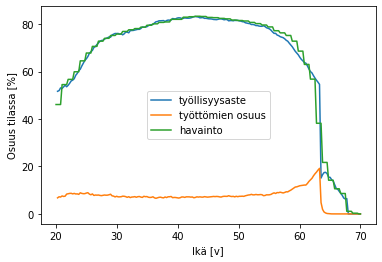

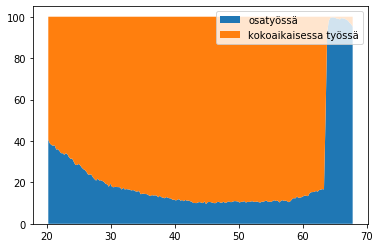

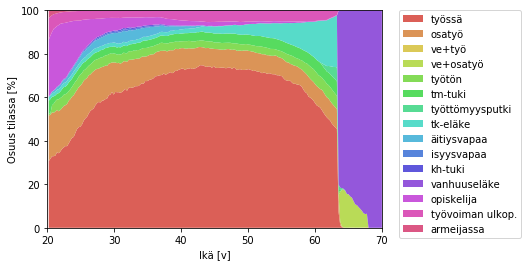

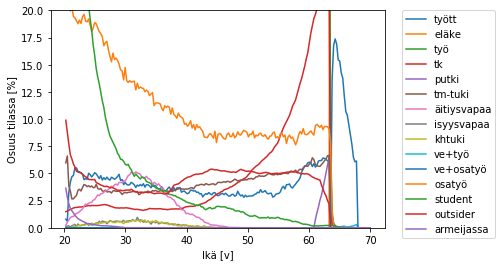

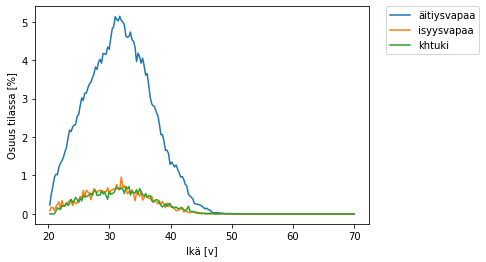

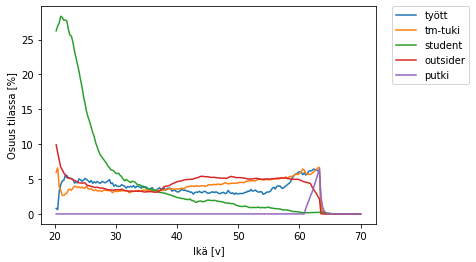

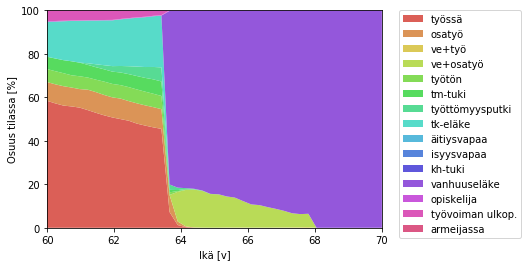

lisäpäivillä on 7190.597413965586 henkilöä


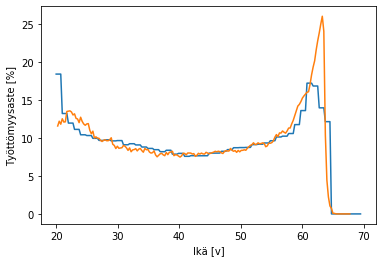

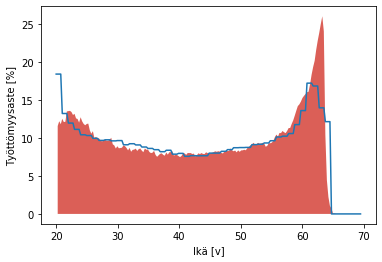

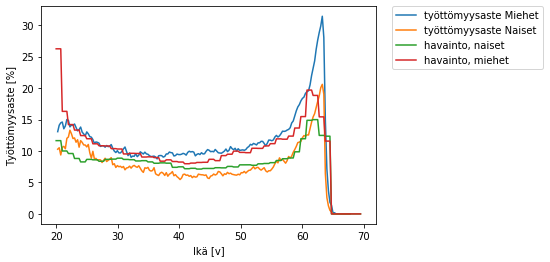

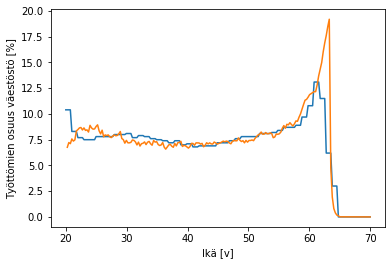

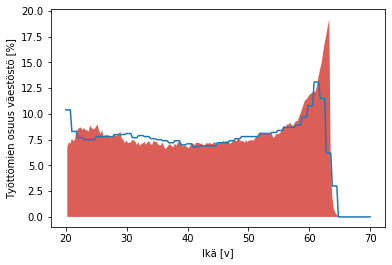

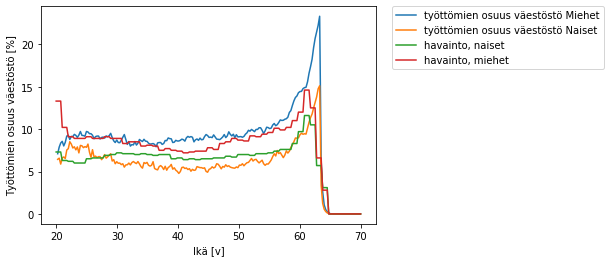

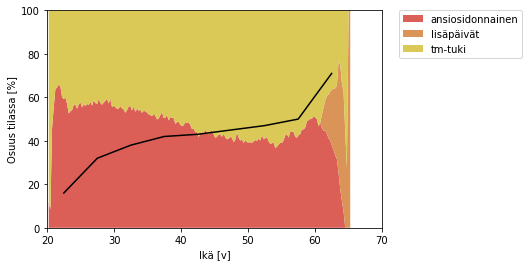

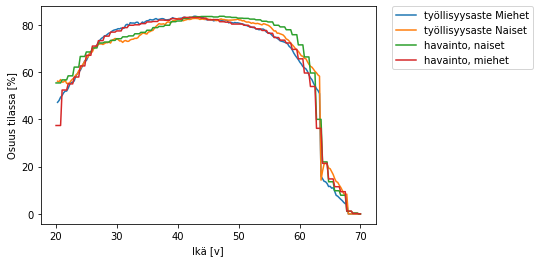

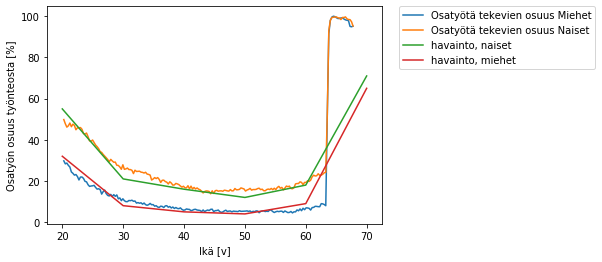

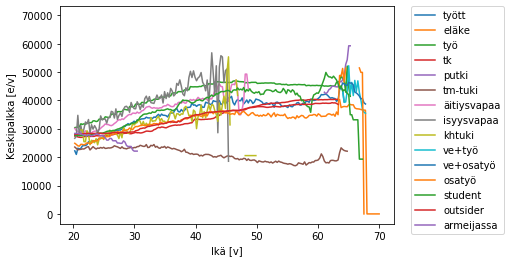

Jakauma ansiosidonnainen+tmtuki+putki, no max age


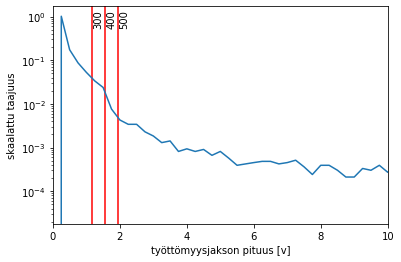

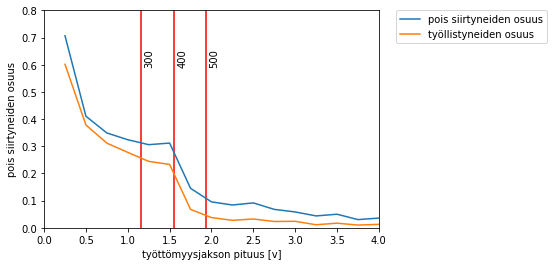

Jakauma ansiosidonnainen+tmtuki+putki, jakso päättynyt ennen 50v ikää


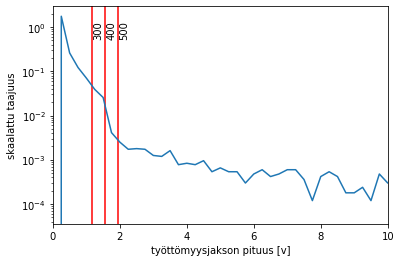

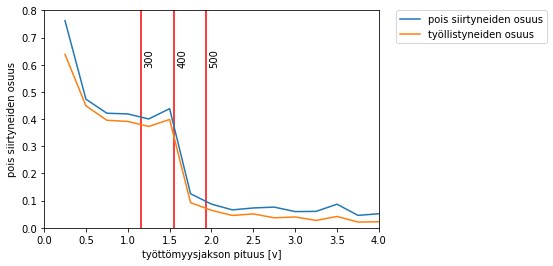

Jakauma ansiosidonnainen+putki, jakso päättynyt ennen 50v ikää, jäljellä oleva aika


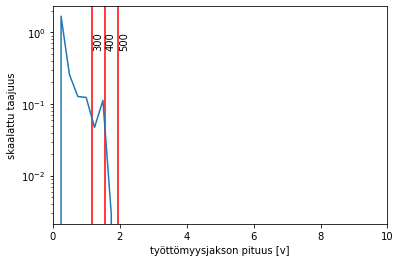

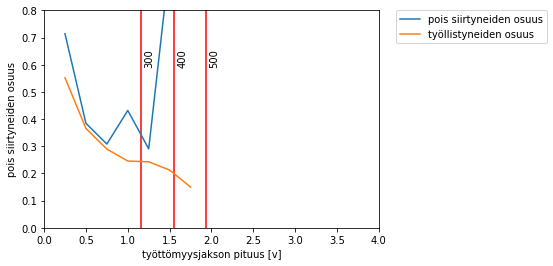

Jakauma tmtuki


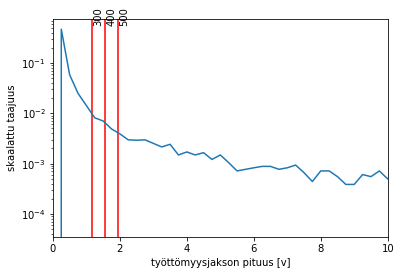

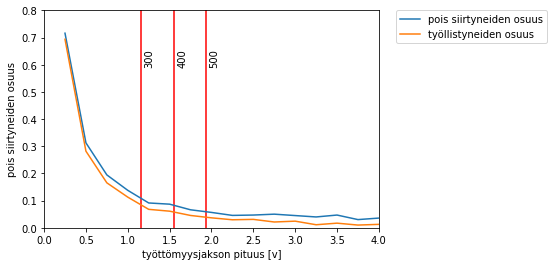

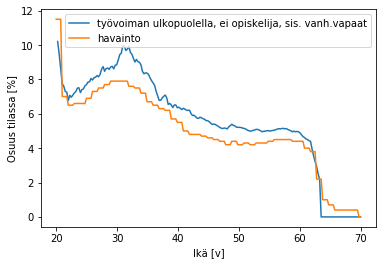

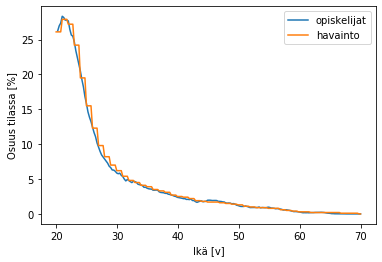

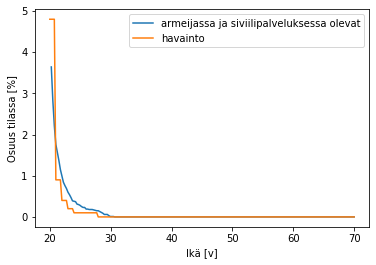

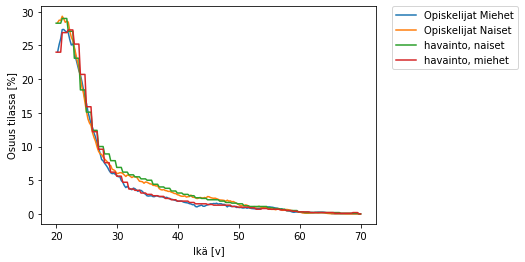

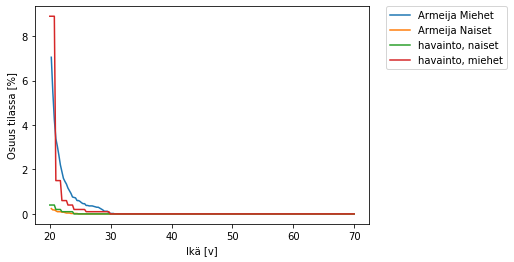

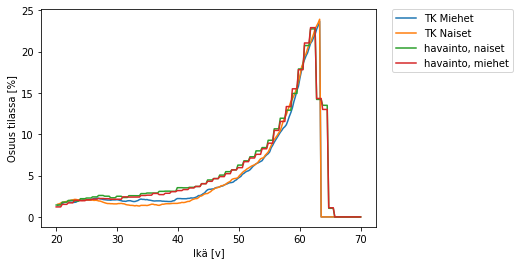

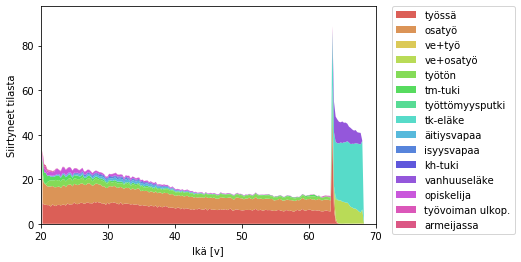

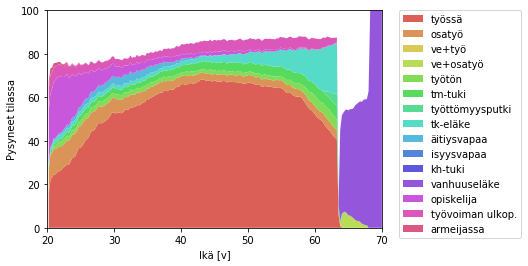

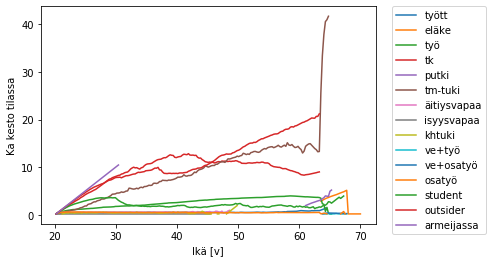

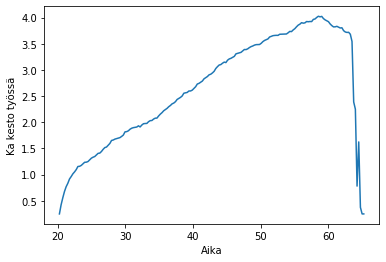

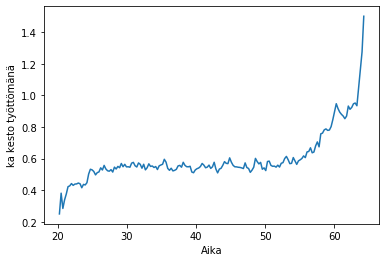

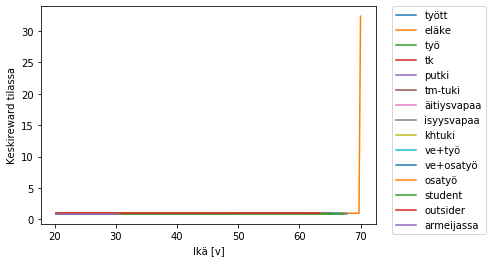

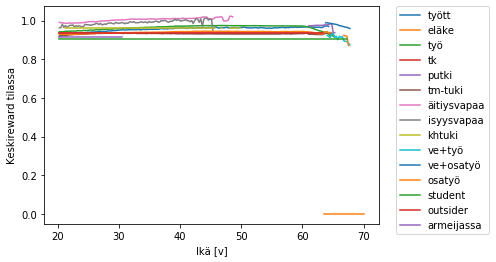

No handles with labels found to put in legend.


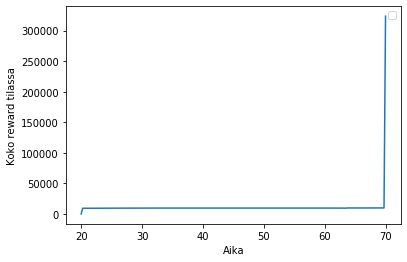

yhteensä reward 223.92610457425747


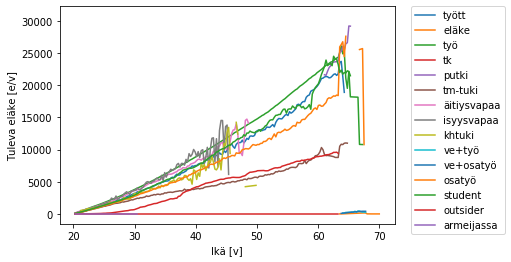

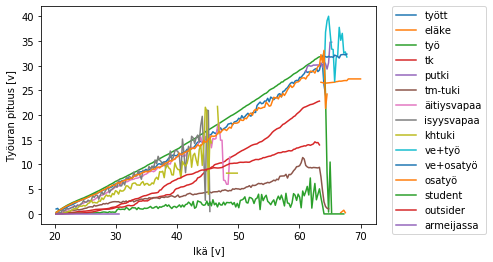

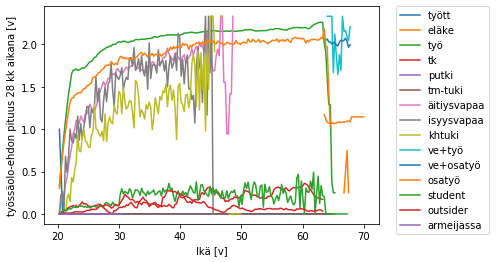

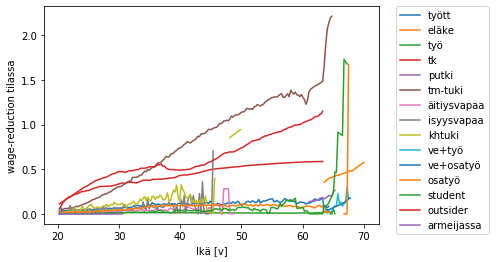

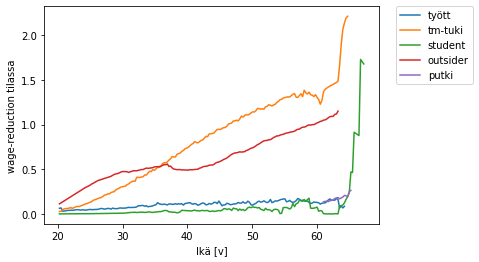

In [8]:
cc1=Lifecycle(env='unemployment-v1',minimal=False,mortality=mortality,perustulo=False,
              randomness=randomness,pinkslip=pinkslip,plotdebug=plotdebug)
cc1.run_results(debug=debug,steps1=size1,steps2=size2,pop=pop_size,deterministic=deterministic,
                train=True,predict=True,batch1=batch1,batch2=batch2,
                save=perusmalli,plot=True,cont=True,start_from=perusmalli_start,results=perusresults,
                callback_minsteps=callback_minsteps,rlmodel=rlmodel,twostage=twostage)

No mortality included
Parameters of lifecycle:
timestep 0.25
gamma 0.9793703613355593 (0.9200000000000003 per anno)
min_age 20
max_age 70
min_retirementage 63.5
max_retirementage 68
ansiopvraha_kesto300 300
ansiopvraha_kesto400 400
ansiopvraha_toe 0.5
perustulo False
karenssi_kesto 0.25
mortality False
randomness True
include_putki True
include_pinkslip True



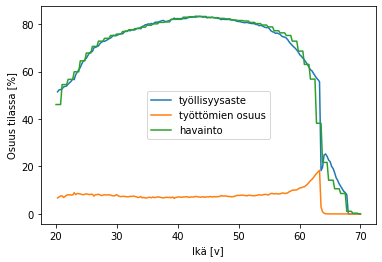

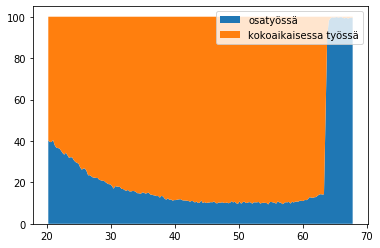

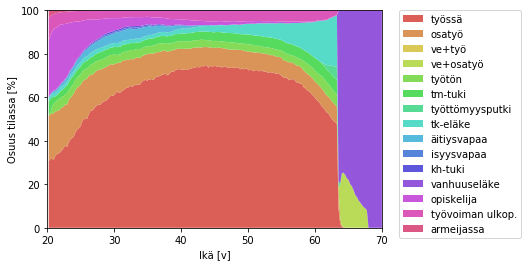

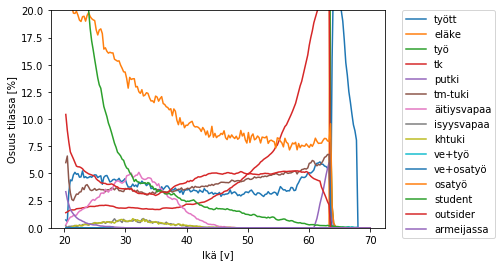

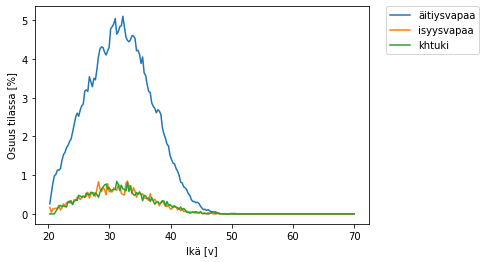

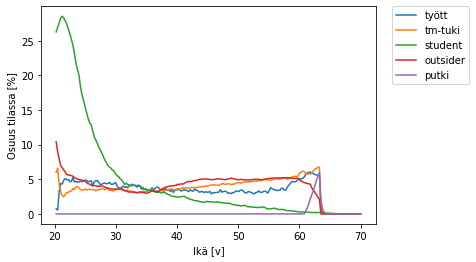

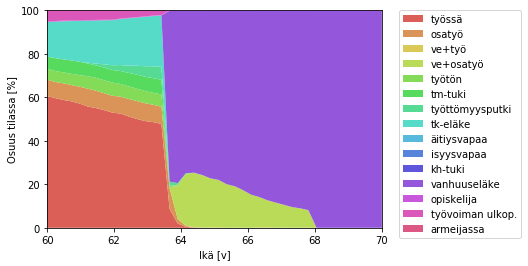

lisäpäivillä on 6352.022408963585 henkilöä


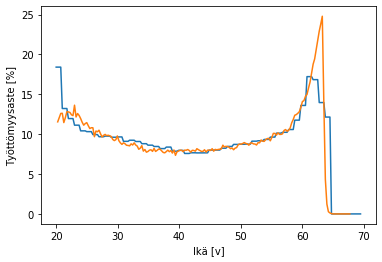

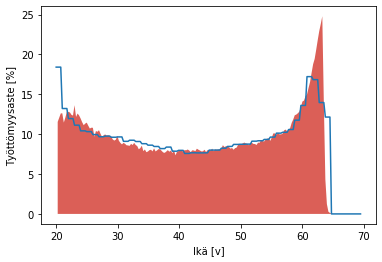

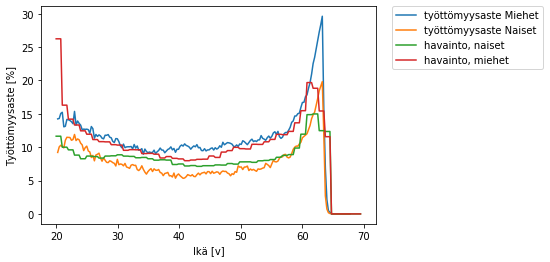

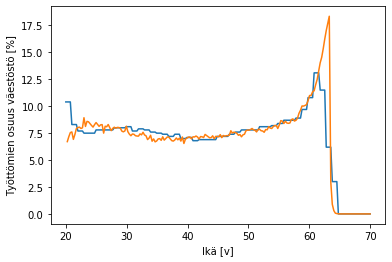

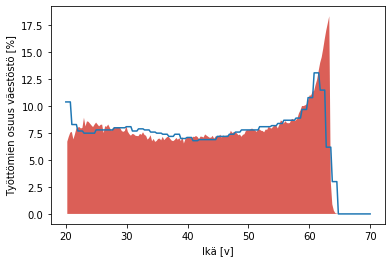

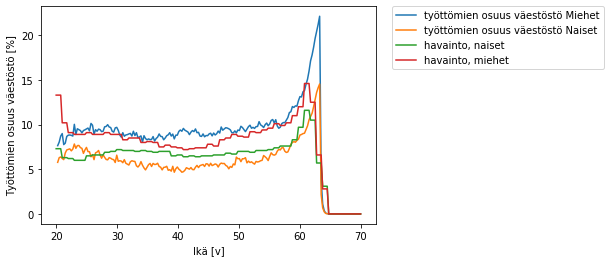

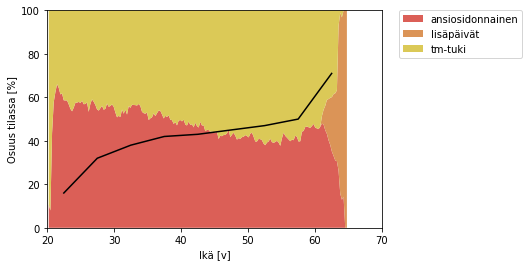

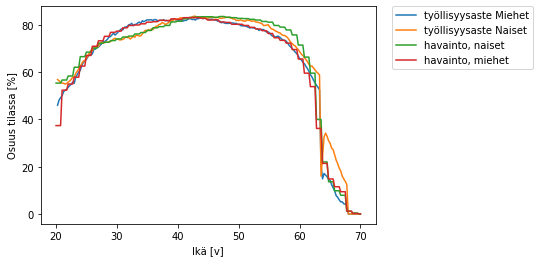

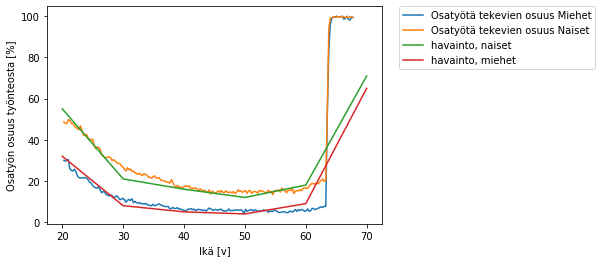

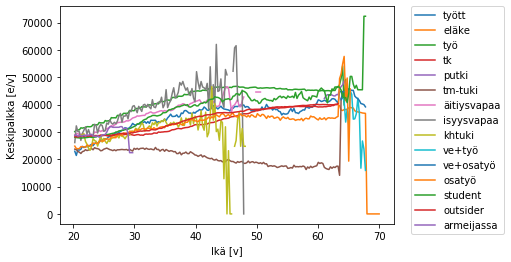

Jakauma ansiosidonnainen+tmtuki+putki, no max age


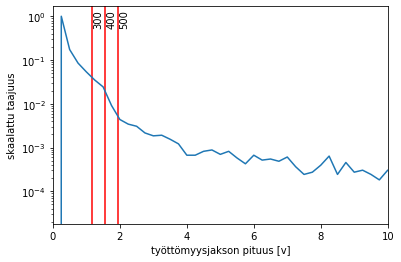

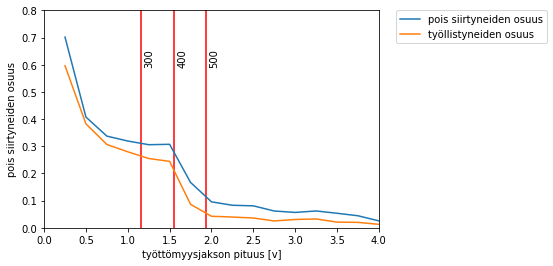

Jakauma ansiosidonnainen+tmtuki+putki, jakso päättynyt ennen 50v ikää


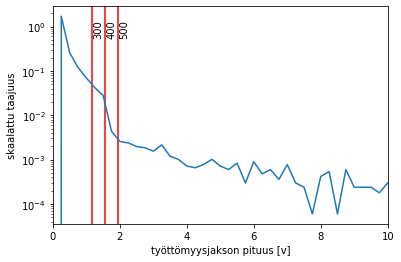

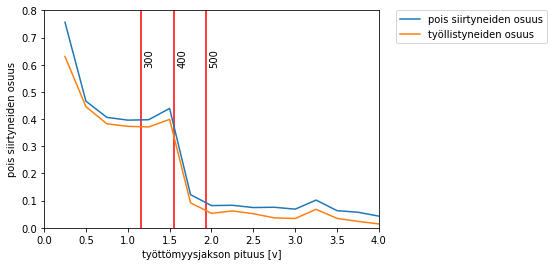

Jakauma ansiosidonnainen+putki, jakso päättynyt ennen 50v ikää, jäljellä oleva aika


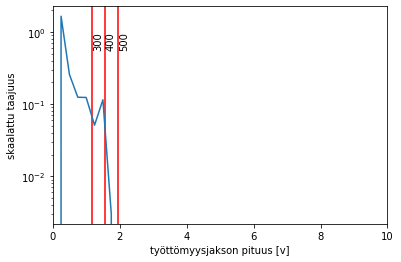

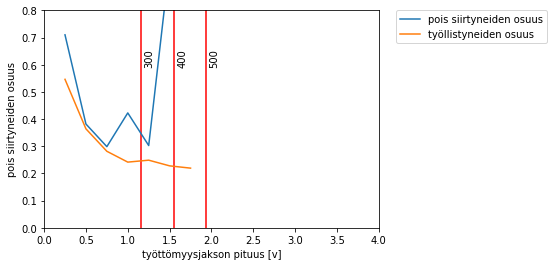

Jakauma tmtuki


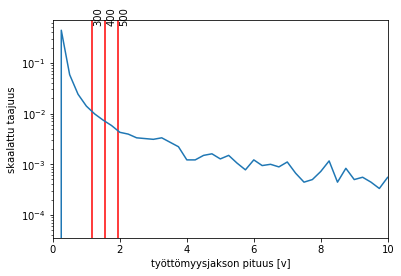

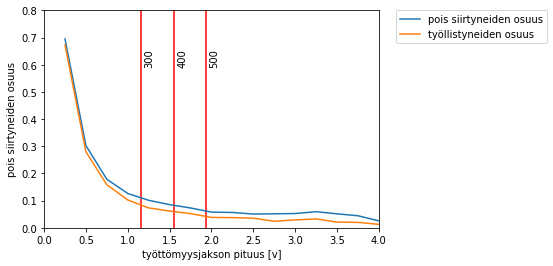

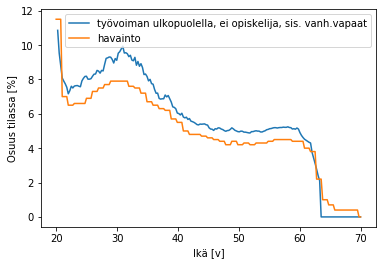

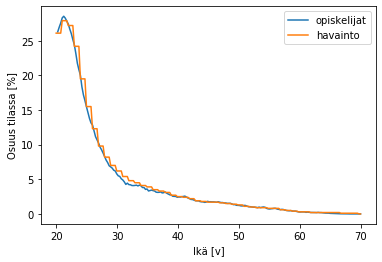

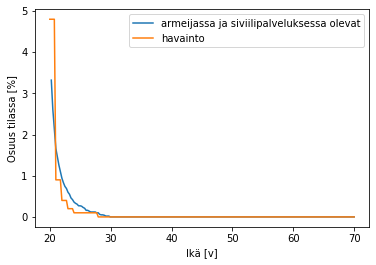

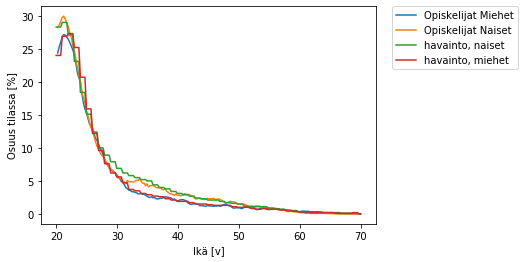

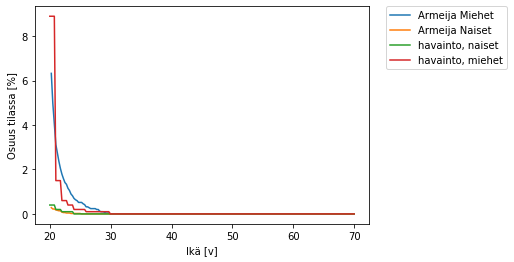

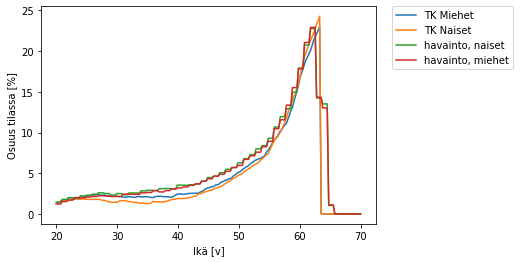

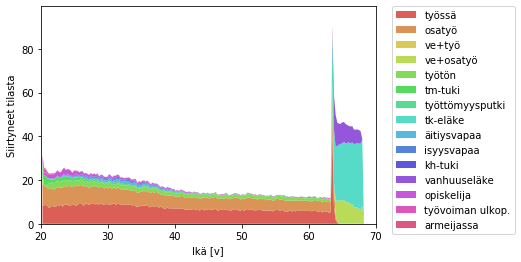

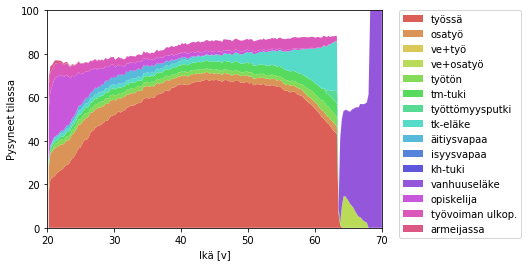

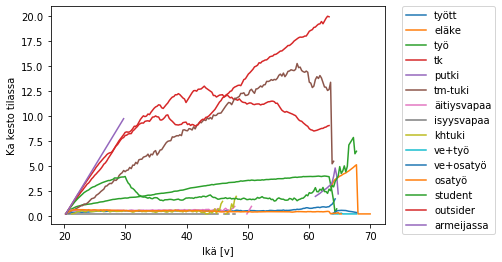

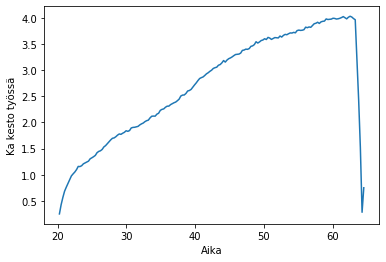

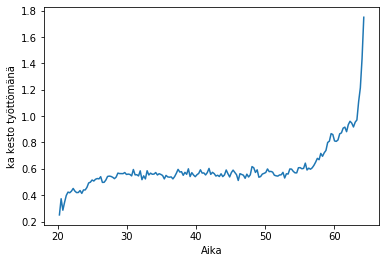

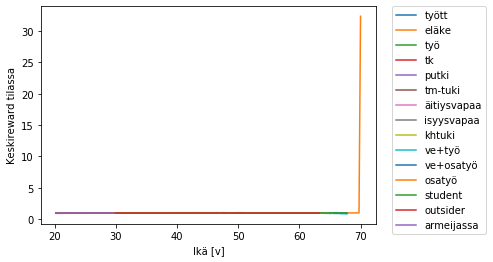

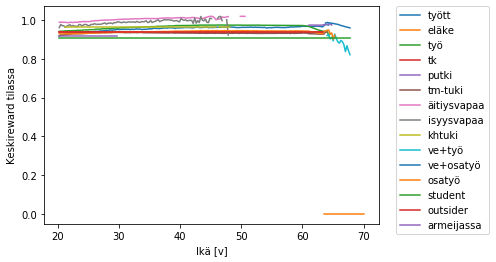

No handles with labels found to put in legend.


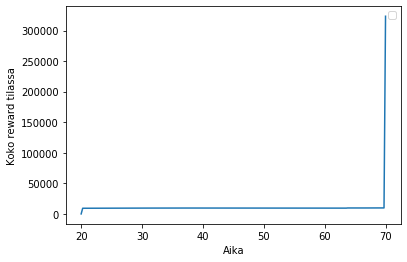

yhteensä reward 223.93728436280685


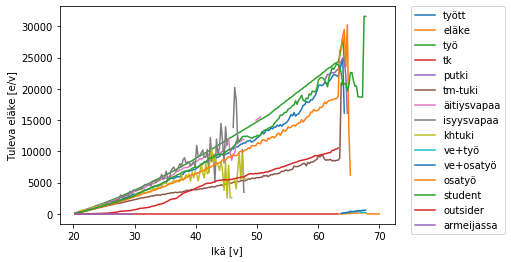

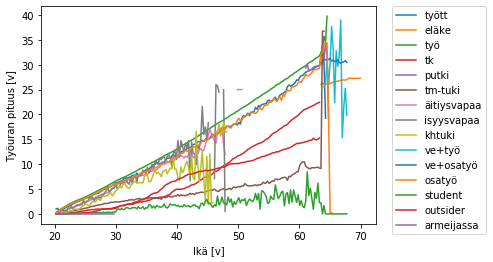

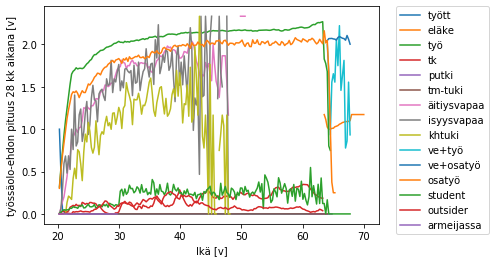

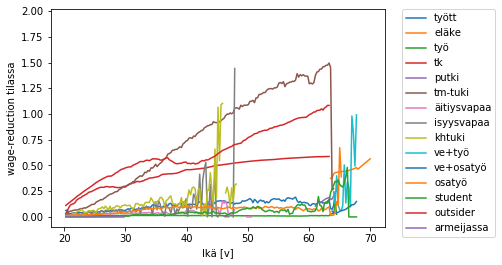

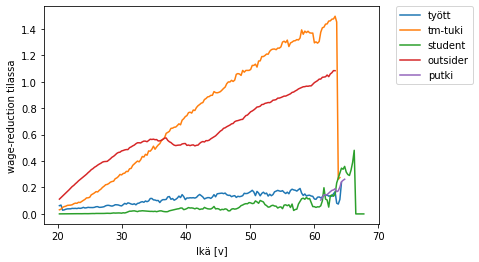

In [6]:
cc1b=Lifecycle(env='unemployment-v1',minimal=False,mortality=mortality,perustulo=False,
              randomness=randomness,pinkslip=pinkslip,plotdebug=False)
cc1b.render(load=perusresults)
cc1b.load_sim(load=perusresults)

No mortality included
Parameters of lifecycle:
timestep 0.25
gamma 0.9793703613355593 (0.9200000000000003 per anno)
min_age 20
max_age 70
min_retirementage 63.5
max_retirementage 68
ansiopvraha_kesto300 300
ansiopvraha_kesto400 400
ansiopvraha_toe 0.5
perustulo False
karenssi_kesto 0.25
mortality False
randomness True
include_putki True
include_pinkslip True



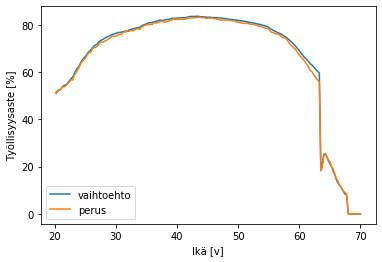

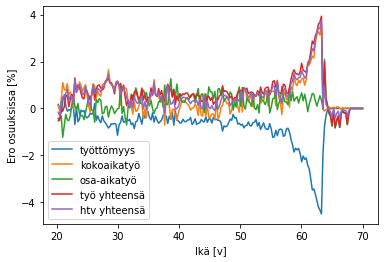

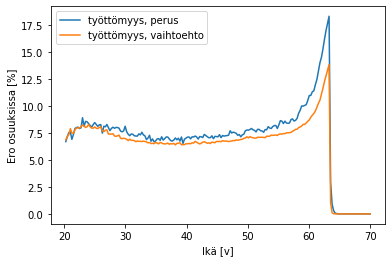

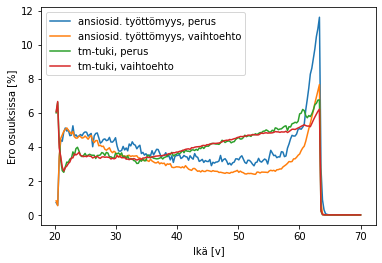

Työllisyysvaikutus 21-63-vuotiaisiin noin 19453 htv ja 23677 työllistä
Työllisyysastevaikutus 21-63-vuotiailla noin 0.81 prosenttia (76.19 vs 75.38)
epävarmuus työllisyysasteissa 0.0062, hajonta 0.0785


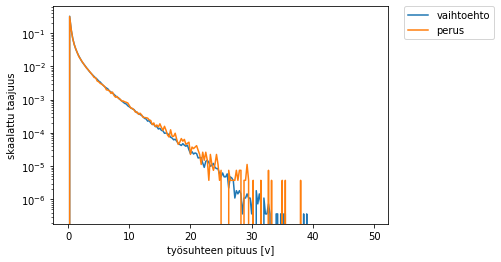

Jakauma ansiosidonnainen+tmtuki+putki, no max age
Perus keskikesto 0.6984979223202171 v vaihtoehto Keskikesto 0.6774152873147057 v
Skaalaamaton Perus lkm 47168 v vaihtoehto lkm 477821 v
Skaalaamaton Perus työtpäiviä yht 32946.75 v vaihtoehto työtpäiviä yht 323683.25 v


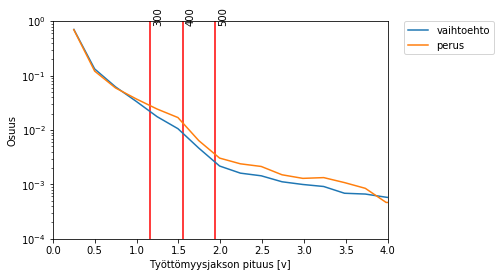

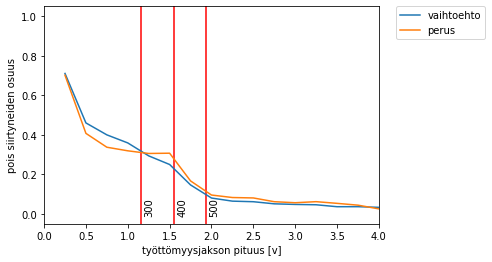

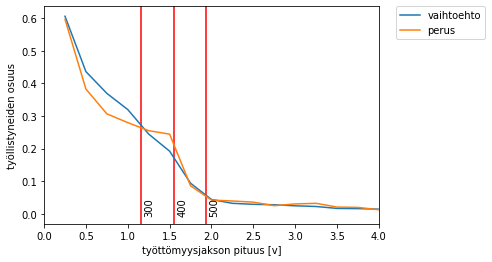

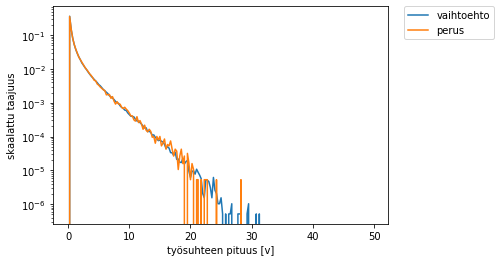

Jakauma ansiosidonnainen+tmtuki+putki, max age 54
Perus keskikesto 0.45719080879630775 v vaihtoehto Keskikesto 0.4365517701099274 v
Skaalaamaton Perus lkm 40517 v vaihtoehto lkm 412545 v
Skaalaamaton Perus työtpäiviä yht 18524.0 v vaihtoehto työtpäiviä yht 180097.25 v


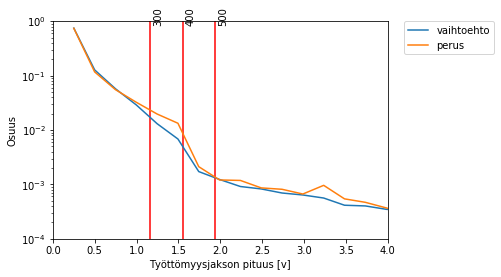

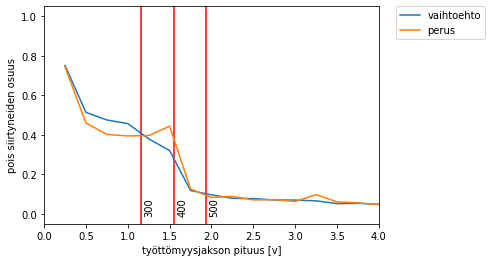

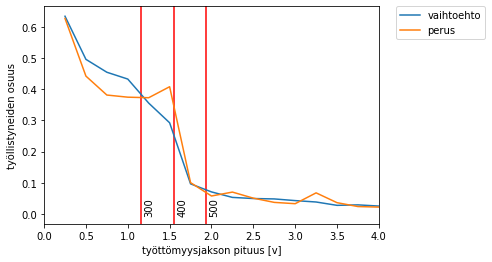

In [7]:
cc2_porras=Lifecycle(env='unemployment-v1',minimal=False,mortality=mortality,perustulo=False,
              randomness=randomness,pinkslip=pinkslip,plotdebug=False)
#cc2_porras.render(load='results/steps_results')
cc2_porras.load_sim(load='results/steps_results')
cc2_porras.compare_with(cc1b)